<a href="https://colab.research.google.com/github/dmahoner/Exam2-retake/blob/main/Exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inputing the data

In [ ]:
import pandas as pd

# Defining a file path variable
file_path = '/content/SAF Dataset (2).xlsx'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame

print(df.head())

# Displays data types and columns
print(df.columns)

print(df.dtypes)

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

Checking for missing data

In [ ]:

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Displays the number of missing values for each column
print(missing_values)


C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64


There are no missing values, so there's no need to  handle them

## Identifying outliers

Making a box plot to visually identify if any outliers are present.

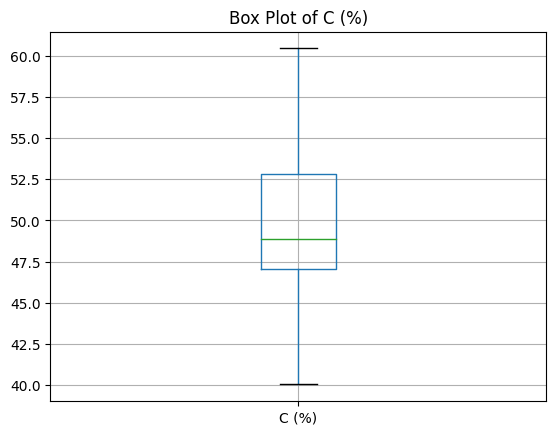

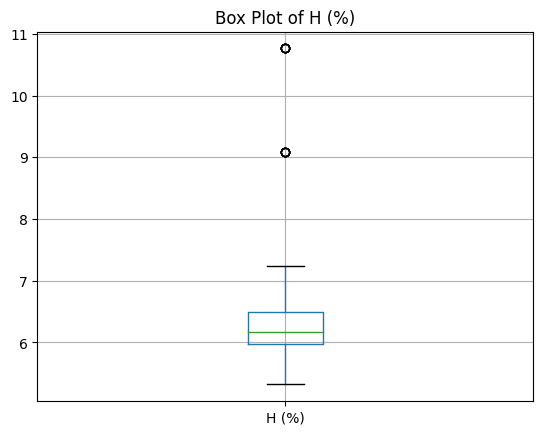

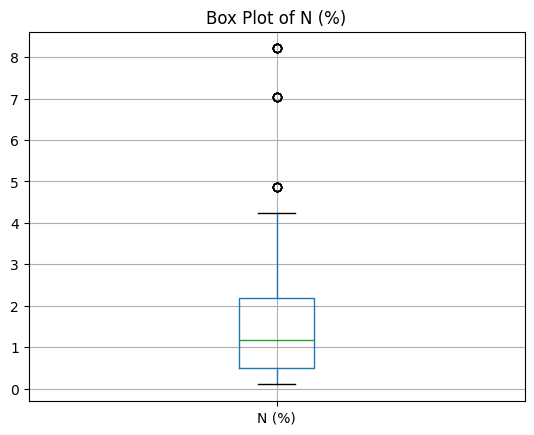

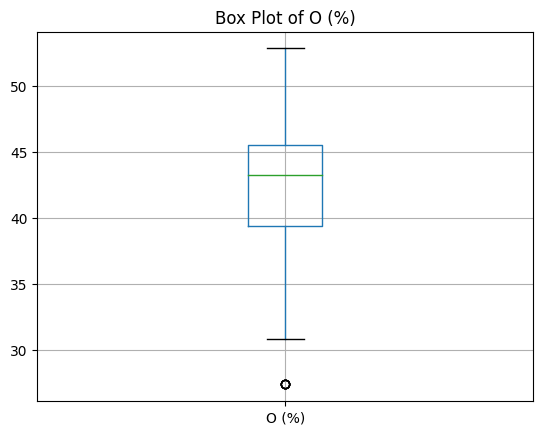

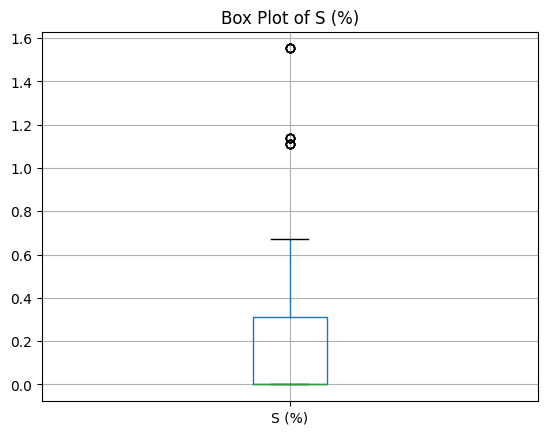

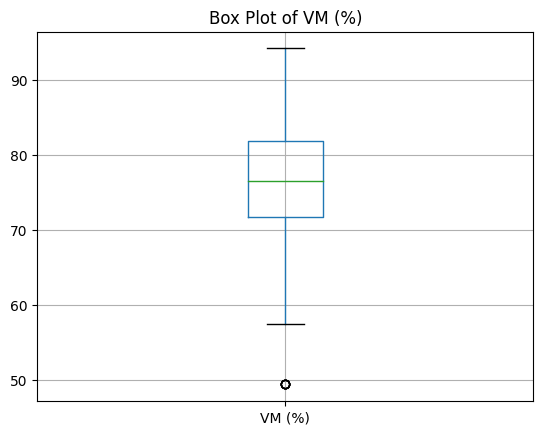

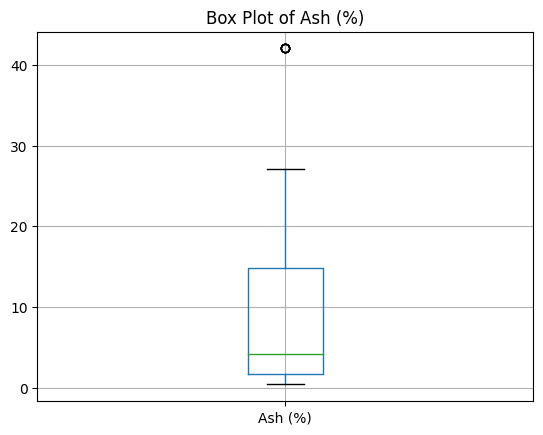

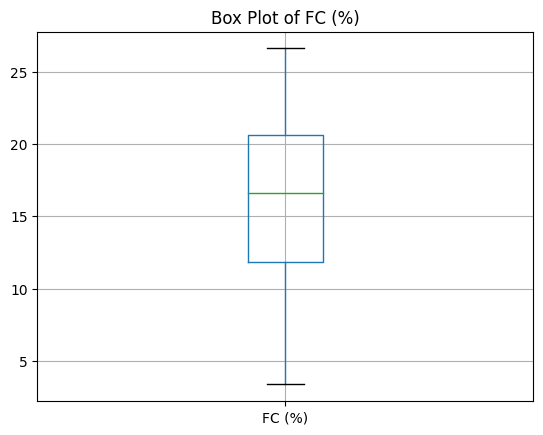

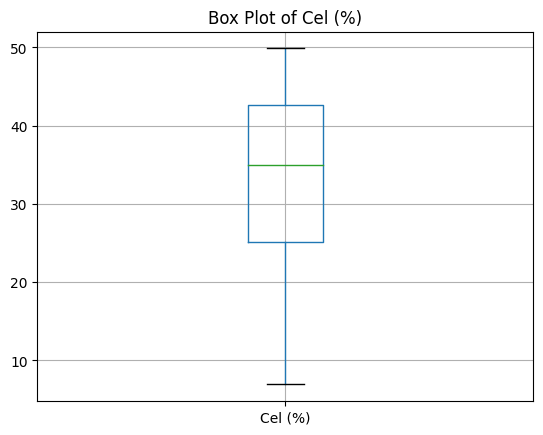

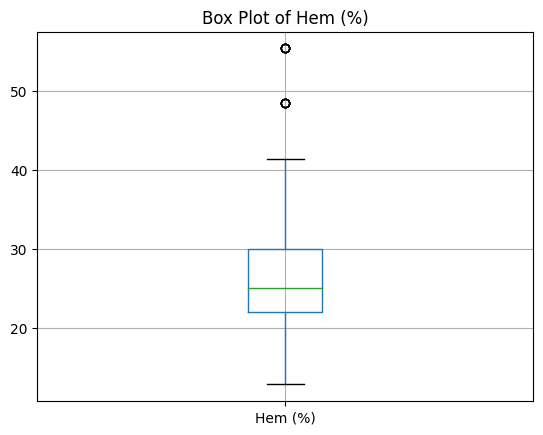

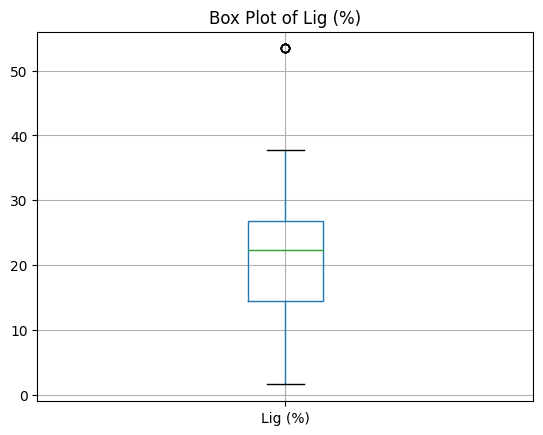

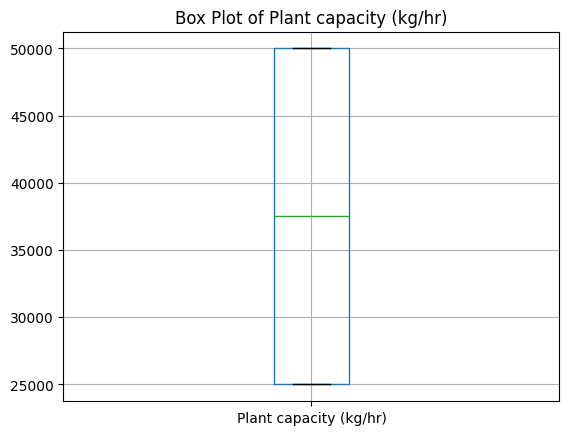

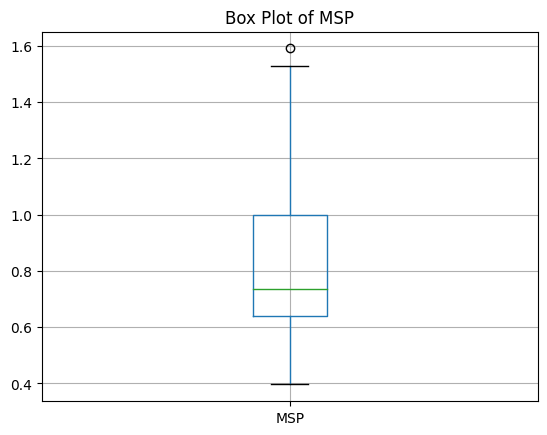

In [ ]:

import matplotlib.pyplot as plt

# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.show()

Getting rid of outliers by calculating the IQR.

In [ ]:

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to each numerical column
for col in numeric_cols:
  df = remove_outliers_iqr(df, col)

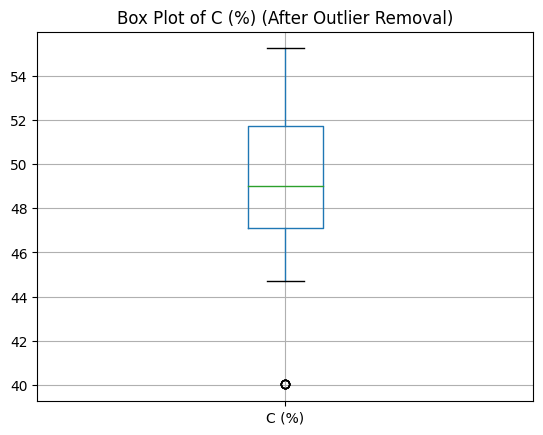

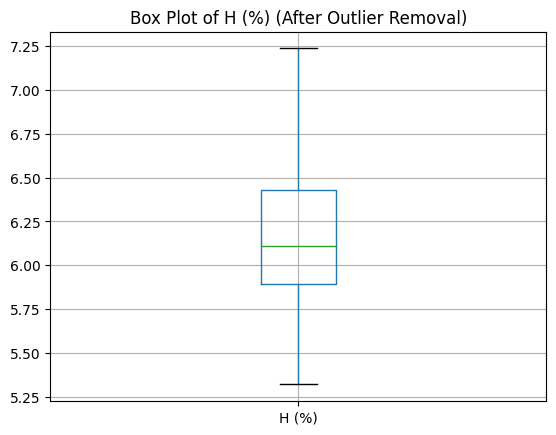

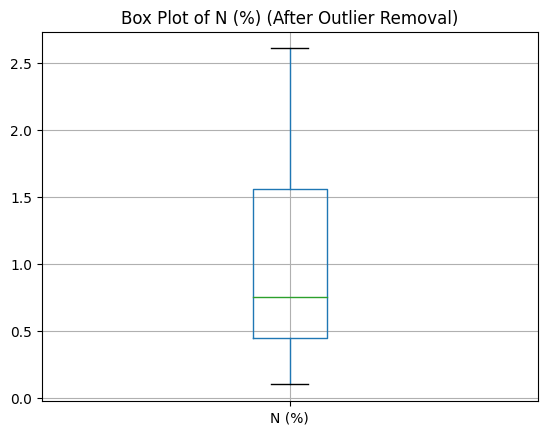

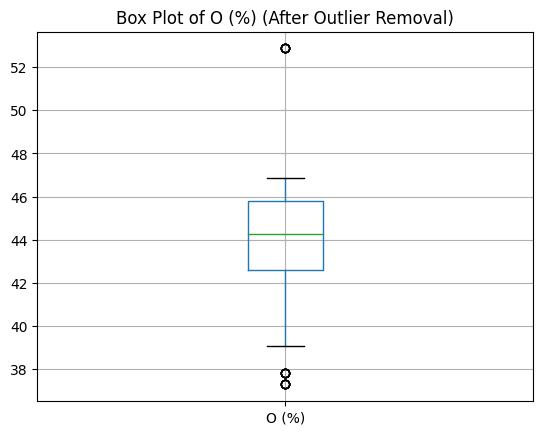

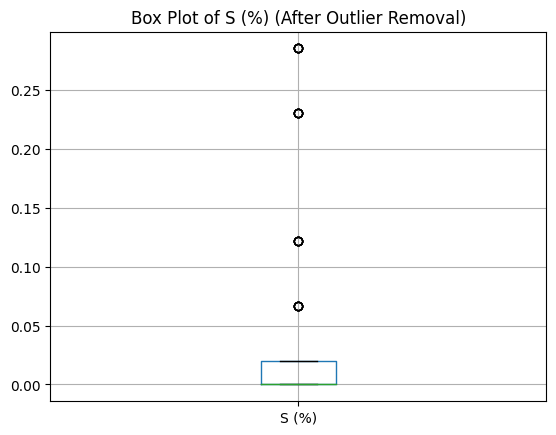

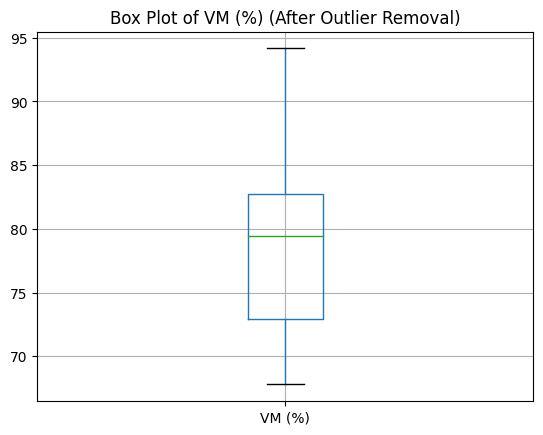

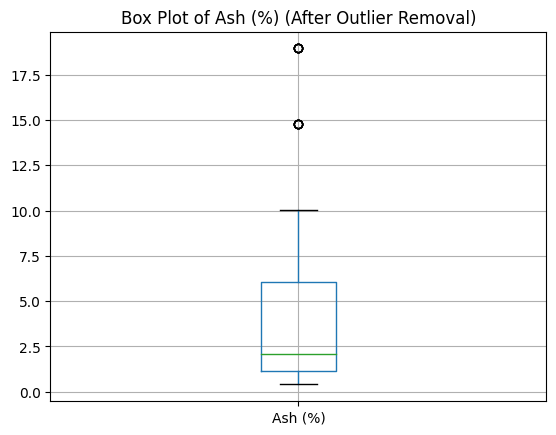

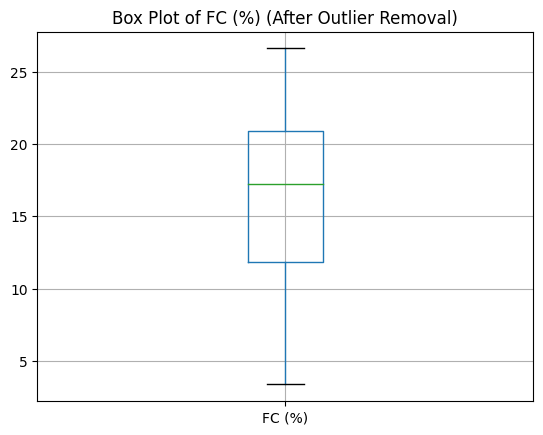

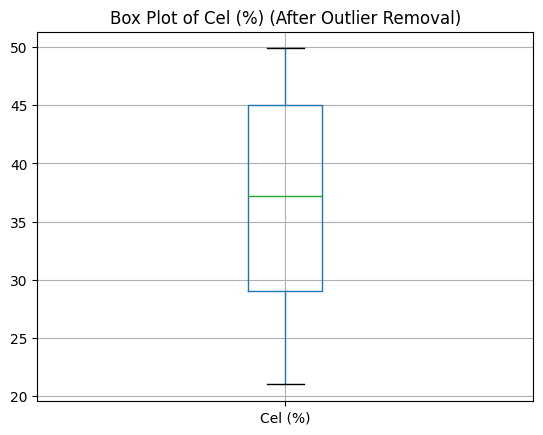

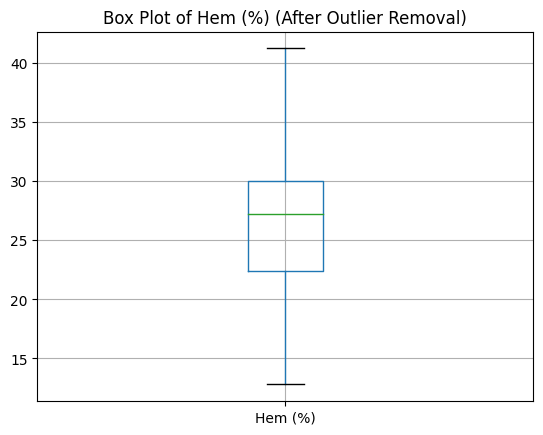

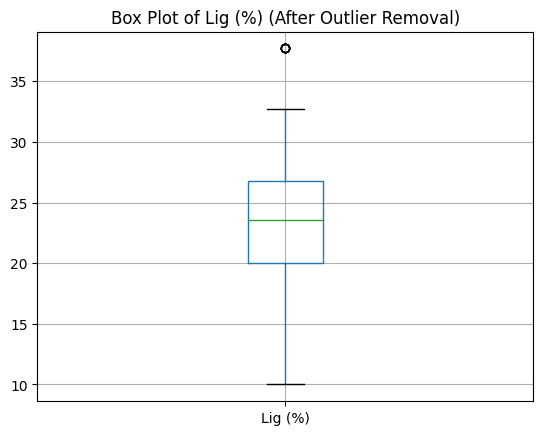

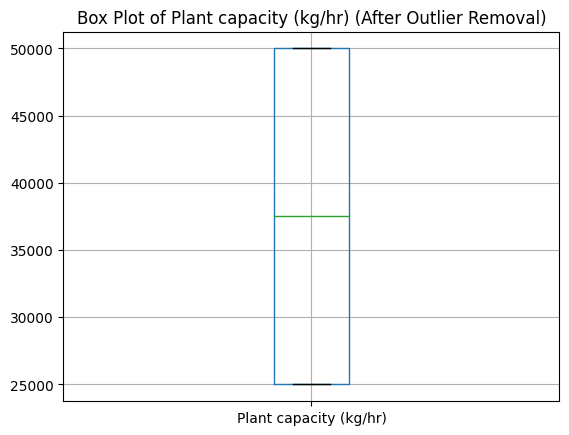

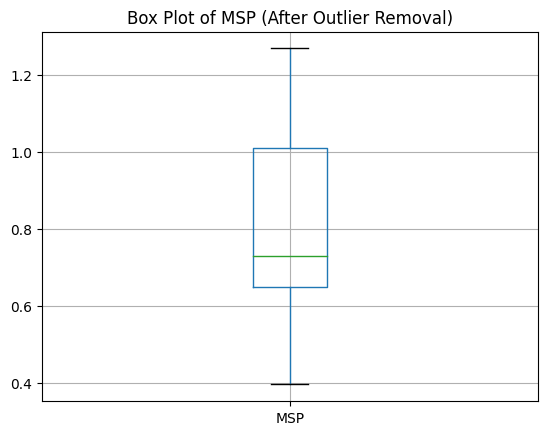

In [ ]:

import matplotlib.pyplot as plt
# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers after outlier removal
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col} (After Outlier Removal)')
  plt.show()

## Summary statistics

In [ ]:
import pandas as pd

def compute_summary_statistics(file_path):

  # Compute summary statistics for numerical columns
  numerical_stats = df.describe()

  # Compute summary statistics for categorical columns
  categorical_stats = df.select_dtypes(include=['object']).describe()

  return numerical_stats, categorical_stats

# assign return values to variables
numerical_stats, categorical_stats = compute_summary_statistics(file_path)

print("Numerical Summary Statistics:")
print(numerical_stats)

print("\nCategorical Summary Statistics:")
print(categorical_stats)

Numerical Summary Statistics:
            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  108.000000  108.000000  108.000000  108.000000  108.000000  108.000000   
mean    48.973186    6.128086    0.999071   43.859513    0.040144   79.103457   
std      3.651209    0.427199    0.694602    3.608898    0.083584    6.345643   
min     40.020000    5.320000    0.100000   37.293729    0.000000   67.780000   
25%     47.100000    5.890589    0.450000   42.620000    0.000000   72.950000   
50%     49.006357    6.110000    0.749739   44.254248    0.000000   79.430000   
75%     51.710000    6.430939    1.560000   45.800000    0.020016   82.748599   
max     55.235524    7.236989    2.609687   52.860000    0.284900   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  108.000000  108.000000  108.000000  108.000000  108.000000   
mean     4.645920   16.250623   36.137421   26.724950   23.324994   
std      5.234121    6.934369    

## converting categorical variables in to floats

In [ ]:
import pandas as pd
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the list of categorical variables
print("Categorical variables found in the dataset:")
print(categorical_columns)

# Checking datatypes
print("\nData types of each column:")
print(df.dtypes)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the updated Data with encoded columns
print("\nDataFrame after one-hot encoding:")
print(df_encoded.head())


Categorical variables found in the dataset:
Index(['Location '], dtype='object')

Data types of each column:
C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object

DataFrame after one-hot encoding:
       C (%)     H (%)     N (%)      O (%)  S (%)     VM (%)    Ash (%)  \
2  40.020000  6.010000  0.880000  52.860000   0.23  72.294705  10.020831   
5  44.695108  7.236989  1.194997  46.872906   0.00  94.161220   2.472767   
6  45.019652  6.569343  2.189781  46.221224   0.00  76.122673  18.948521   
7  45.896172  5.709845  1.622249  46.771734   0.00  77.318919 

## Checking for redundant columns

In [ ]:
import pandas as pd

def check_redundant_columns(df):

  # Initialize a list to store redundant column pairs
  redundant_columns = []

  # Iterate through all possible pairs of columns
  for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
      # Check if the two columns are identical
      if (df[df.columns[i]] == df[df.columns[j]]).all():
        # If the columns are identical, add them to the list of redundant pairs
        redundant_columns.append((df.columns[i], df.columns[j]))

  # Return the list of redundant column pairs
  return redundant_columns

redundant_pairs = check_redundant_columns(df)
print("Redundant column pairs:", redundant_pairs)

## Checking for duplicate columns

In [ ]:
import pandas as pd

def check_duplicate_columns(df):

  duplicate_columns = []
  for col in df.columns:
    # Check if the current column is equal to its shifted version
    if df[col].equals(df[col].shift()):
      # If so, add the column name to the list of duplicate columns
      duplicate_columns.append(col)
  return duplicate_columns

# Create a sample DataFrame with some duplicate columns
data = {'col1': [1, 2, 3], 'col2': [1, 2, 3], 'col3': [4, 5, 6]}
df = pd.DataFrame(data)

# Call the function to check for duplicate columns
duplicate_cols = check_duplicate_columns(df)

# Print the results
if duplicate_cols:
  print("Duplicate columns found:")
  print(duplicate_cols)
else:
  print("No duplicate columns found.")

No duplicate columns found.


## Visualizing the data

scatter plots displaying the outputs relationship with 4 numerical inputs

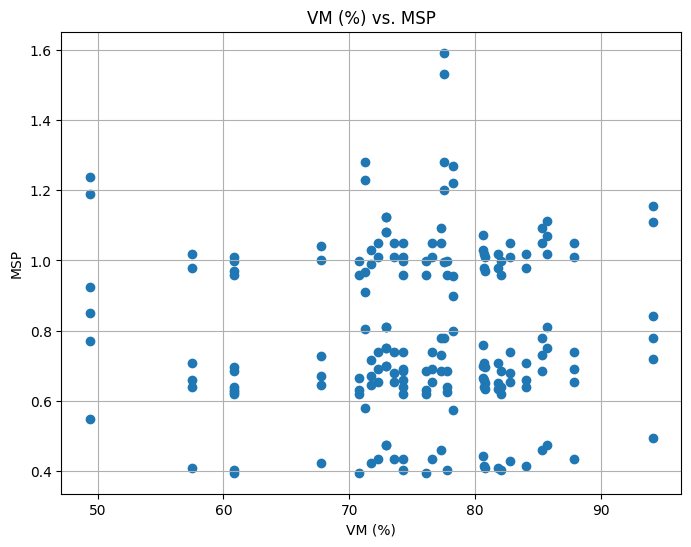

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

file_path = '/content/SAF Dataset (2).xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'MSP'
y_column = 'VM (%)'

create_scatter_plot(file_path, x_column, y_column)

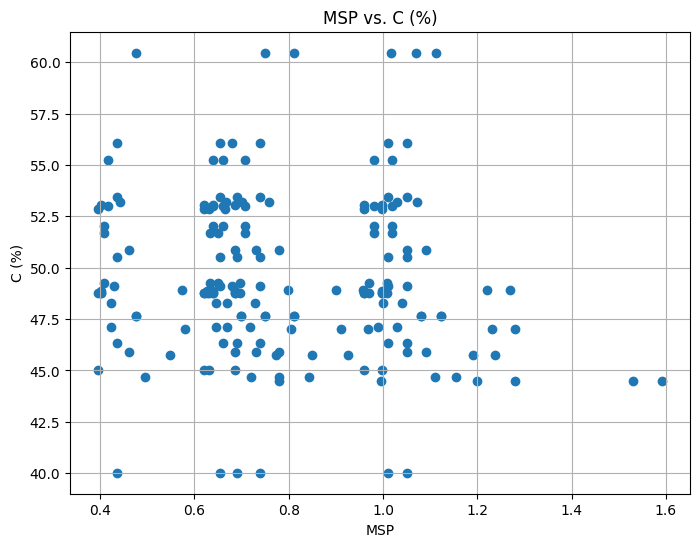

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()


# Specify the column names for the x-axis and y-axis
x_column = 'MSP'
y_column = 'C (%)'

create_scatter_plot(file_path, x_column, y_column)

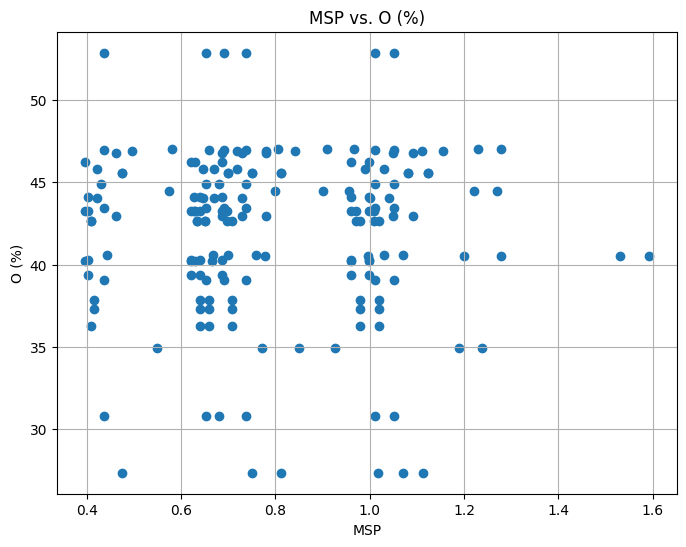

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):

  df = pd.read_excel(file_path)
#creating logistics of scatter plot
  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()
# Specify the column names for the x-axis and y-axis
x_column = 'MSP'
y_column = 'O (%)'

create_scatter_plot(file_path, x_column, y_column)

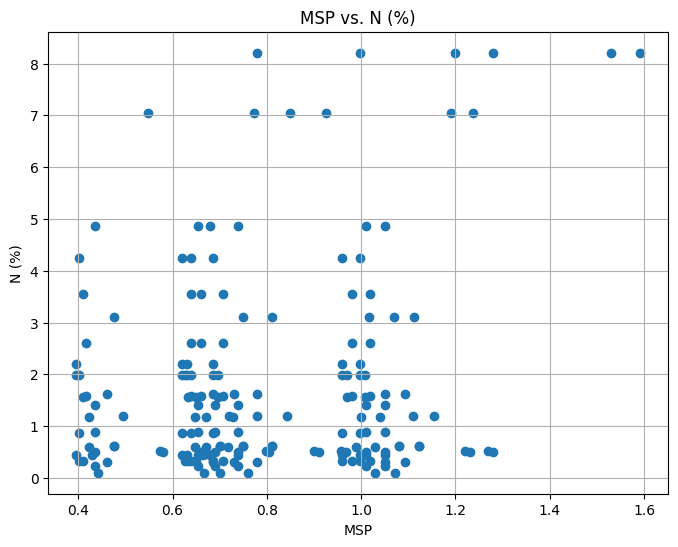

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()


# Specify the column names for the x-axis and y-axis
x_column = 'MSP'
y_column = 'N (%)'

create_scatter_plot(file_path, x_column, y_column)

Creating a bar graph to explore categorical variable relationship

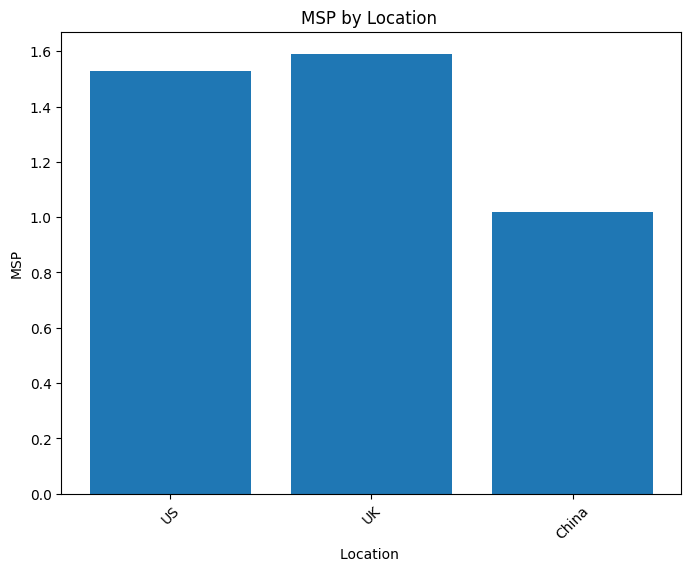

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_bar_graph(file_path, x_column, y_column):

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.bar(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{y_column} by {x_column}")
  plt.xticks(rotation=45)  # Rotate x-axis labels if needed
  plt.show()


# Specify the column names for the x-axis and y-axis
x_column = 'Location '  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_bar_graph(file_path, x_column, y_column)

## Correlation and relationships

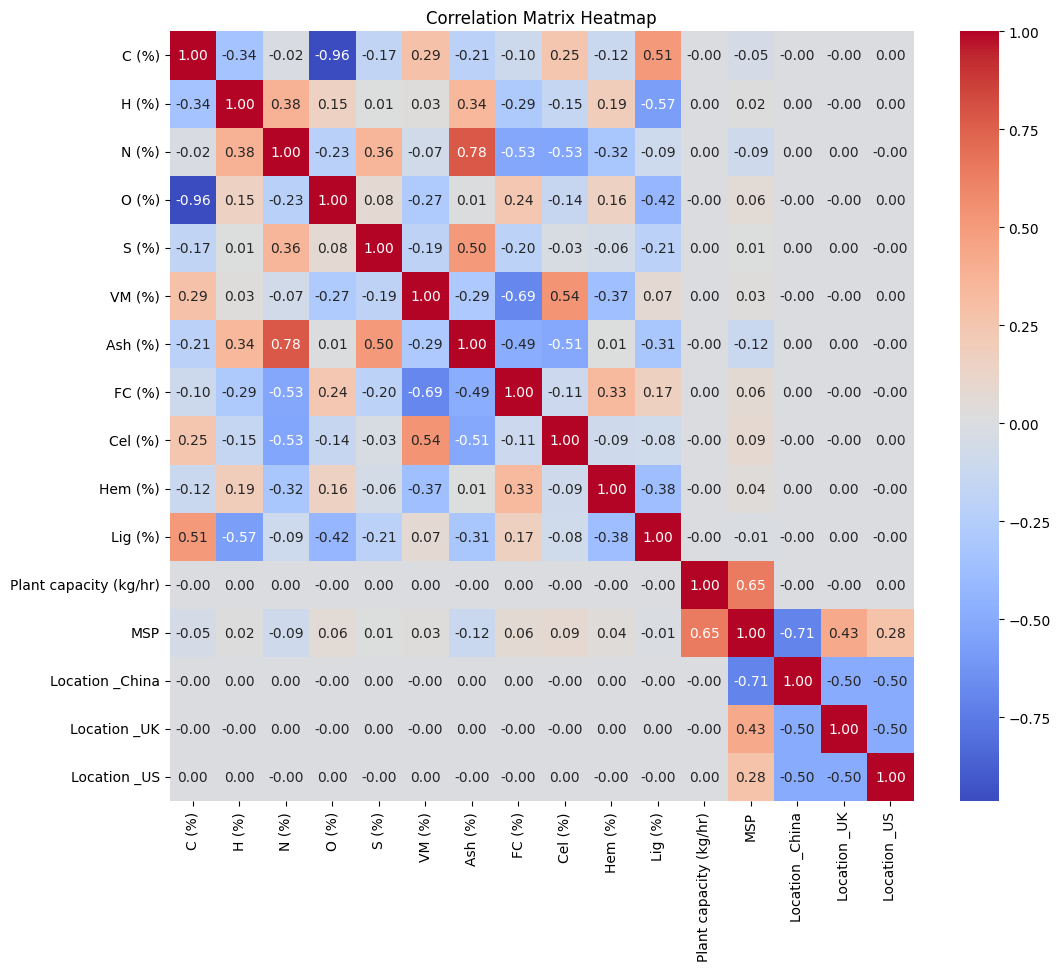

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the R^2 values
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def calculate_r_squared(file_path, target_variable):

  df = pd.read_excel(file_path)

  # Separate the target variable from the predictor variables
  X = df.drop(columns=[target_variable])
  y = df[target_variable]

  # Convert non-numeric columns to numeric if possible
  for col in X.columns:
    try:
      X[col] = pd.to_numeric(X[col])
    except ValueError:
      print(f"Column {col} could not be converted to numeric and will be excluded from analysis.")
      X = X.drop(col, axis=1)

  # Create a dictionary to store R-squared values
  r_squared_values = {}

  # Loop through each predictor variable
  for predictor_variable in X.columns:
    # Create a new DataFrame with only the current predictor variable
    X_single = X[[predictor_variable]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    model.fit(X_train, y_train)

    # Make predictions on the data
    y_pred = model.predict(X_test)

    # Calculate the R-squared value
    r_squared = r2_score(y_test, y_pred)

    # Store the R-squared value in the dictionary
    r_squared_values[predictor_variable] = r_squared

  return r_squared_values


target_variable = 'MSP'
r_squared_results = calculate_r_squared(file_path, target_variable)

print("R-squared values for each predictor variable:")
for variable, r_squared in r_squared_results.items():
  print(f"{variable}: {r_squared}")

Column Location  could not be converted to numeric and will be excluded from analysis.
R-squared values for each predictor variable:
C (%): 0.005379386375597428
H (%): -0.036639707603475014
N (%): 0.06334522707065005
O (%): -0.008444425206090678
S (%): -0.0012720785733906226
VM (%): -0.014167675369456179
Ash (%): -0.019585392436315407
FC (%): -0.008476012885525908
Cel (%): 5.381009095306588e-06
Hem (%): 0.07273178127250912
Lig (%): -0.008210707486485447
Plant capacity (kg/hr): 0.2644360434875648


By Looking at the visual representation of a heat map and the numerical R^2 values. It is aparrent that the values that have the highest correlation to MSP are Plant capacity,  Hem %, Location, and N%.